In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/newdataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562.0,360.0,1.0,Urban,Y


# **Data Preprocessing**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,237800,0.0,5822.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,336692,0.0,3280.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,661904,19680.0,20746.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,621806,0.0,15334.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,375806,0.0,10906.0,360.0,0.0,Semiurban,N


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,592.000000,600.00000,564.000000
mean,4.430837e+05,1.329422e+05,12566.777027,342.00000,0.842199
std,5.009414e+05,2.399524e+05,15055.595469,65.12041,0.364878
min,1.230000e+04,0.000000e+00,738.000000,12.00000,0.000000
25%,2.359550e+05,0.000000e+00,8200.000000,360.00000,1.000000
50%,3.126250e+05,9.745700e+04,10496.000000,360.00000,1.000000
75%,4.751900e+05,1.883745e+05,13776.000000,360.00000,1.000000
max,6.642000e+06,3.416694e+06,336200.000000,480.00000,1.000000


In [ ]:
df[['ApplicantIncome','LoanAmount']]

,ApplicantIncome,LoanAmount
0,479618,NaN
1,375806,10496.0
2,246000,5412.0
3,211806,9840.0
4,492000,11562.0
...,...,...
609,237800,5822.0
610,336692,3280.0
611,661904,20746.0
612,621806,15334.0


## Handling Numerical Missing Data

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,12566.777027,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,237800,0.0,5822.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,336692,0.0,3280.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,661904,19680.0,20746.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,621806,0.0,15334.000000,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Handle Categorical Missing Data

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,12566.777027,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,237800,0.0,5822.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,336692,0.0,3280.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,661904,19680.0,20746.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,621806,0.0,15334.000000,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Exploratory Data Analysis(EDA)**

# Categorical Data

<Axes: xlabel='Gender', ylabel='count'>

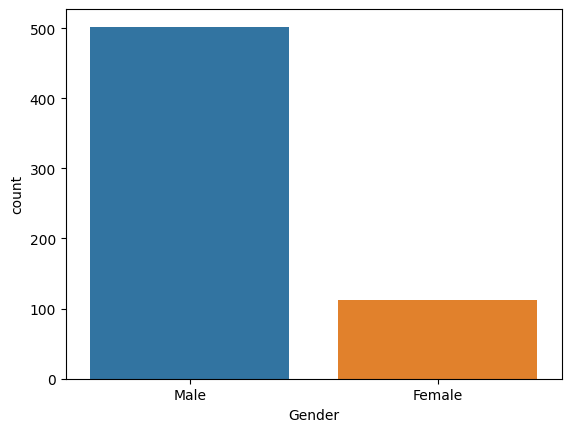

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender',data=df)



<Axes: xlabel='Dependents', ylabel='count'>

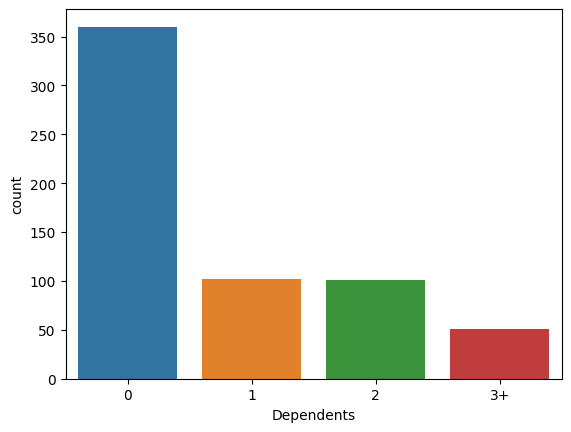

In [ ]:
sns.countplot(x='Dependents',data=df)

<Axes: xlabel='Married', ylabel='count'>

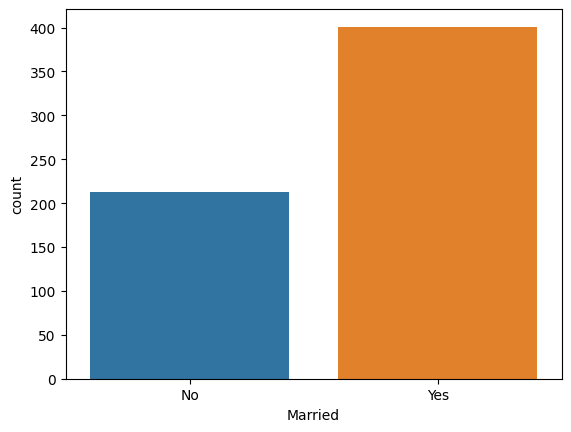

In [ ]:

sns.countplot(x='Married',data=df)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Numerical Data

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

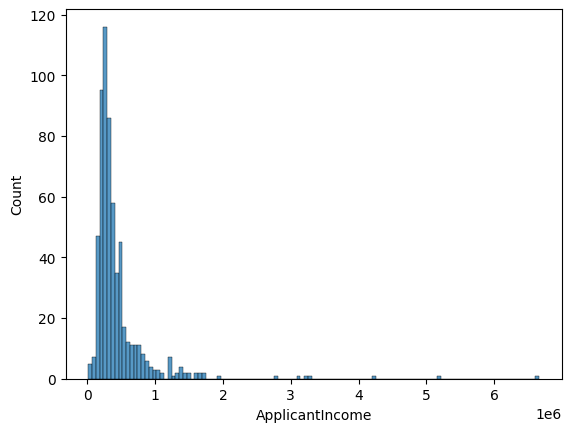

In [ ]:
sns.histplot(data = df.ApplicantIncome,binrange=(12300,6664200))

<ipython-input-115-b320328e805e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CoapplicantIncome)


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

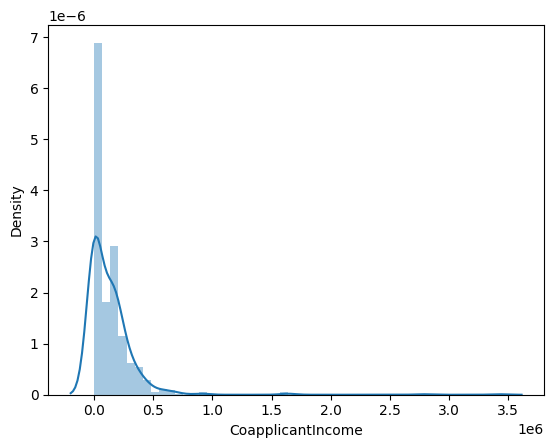

In [ ]:
sns.distplot(df.CoapplicantIncome)

<ipython-input-116-a477b5a8ff76>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LoanAmount)


<Axes: xlabel='LoanAmount', ylabel='Density'>

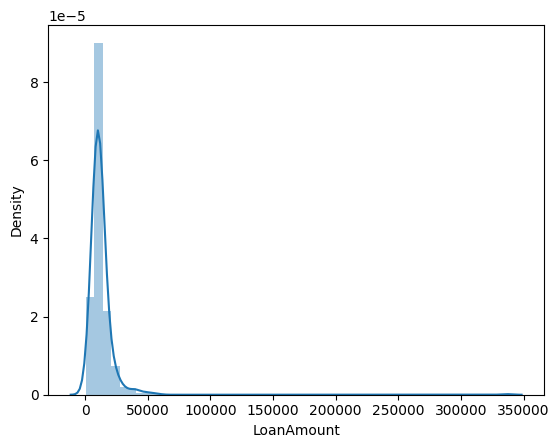

In [ ]:
sns.distplot(df.LoanAmount)


<ipython-input-117-b06917134064>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Credit_History)


<Axes: xlabel='Credit_History', ylabel='Density'>

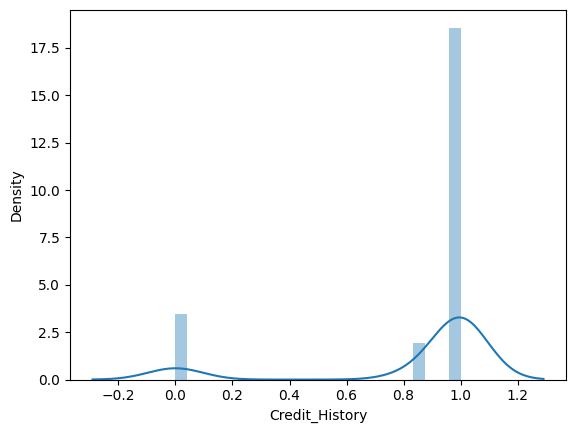

In [ ]:
sns.distplot(df.Credit_History)

# Lable Encoding

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,12566.777027,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,237800,0.0,5822.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,336692,0.0,3280.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,661904,19680.0,20746.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,621806,0.0,15334.000000,360.0,1.0,Urban,Y


In [ ]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Gender.value_counts()


1    502
0    112
Name: Gender, dtype: int64

In [ ]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df.Self_Employed.value_counts()


0    532
1     82
Name: Self_Employed, dtype: int64

In [ ]:
df.Married=df.Married.map({'Yes':1,'No':0})
df.Married.value_counts()


1    401
0    213
Name: Married, dtype: int64

In [ ]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df.Education.value_counts()


1    480
0    134
Name: Education, dtype: int64

In [ ]:
df.Dependents=df.Dependents	.map({'0':0,'1':1,'2':2,'3+':3})
df.Dependents.value_counts()


0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
df.Property_Area=df.Property_Area.map({'Urban':0,'Rural':1,'Semiurban':2})
df.Property_Area.value_counts()


2    233
0    202
1    179
Name: Property_Area, dtype: int64

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,479618,0.0,12566.777027,360.0,1.0,0,Y
1,LP001003,1,1,1,1,0,375806,123656.0,10496.000000,360.0,1.0,1,N
2,LP001005,1,1,0,1,1,246000,0.0,5412.000000,360.0,1.0,0,Y
3,LP001006,1,1,0,0,0,211806,193356.0,9840.000000,360.0,1.0,0,Y
4,LP001008,1,0,0,1,0,492000,0.0,11562.000000,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,237800,0.0,5822.000000,360.0,1.0,1,Y
610,LP002979,1,1,3,1,0,336692,0.0,3280.000000,180.0,1.0,1,Y
611,LP002983,1,1,1,1,0,661904,19680.0,20746.000000,360.0,1.0,0,Y
612,LP002984,1,1,2,1,0,621806,0.0,15334.000000,360.0,1.0,0,Y


In [ ]:
x = df.drop(columns=["Loan_ID",'Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,479618,0.0,12566.777027,360.0,1.0,0
1,1,1,1,1,0,375806,123656.0,10496.000000,360.0,1.0,1
2,1,1,0,1,1,246000,0.0,5412.000000,360.0,1.0,0
3,1,1,0,0,0,211806,193356.0,9840.000000,360.0,1.0,0
4,1,0,0,1,0,492000,0.0,11562.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,237800,0.0,5822.000000,360.0,1.0,1
610,1,1,3,1,0,336692,0.0,3280.000000,180.0,1.0,1
611,1,1,1,1,0,661904,19680.0,20746.000000,360.0,1.0,0
612,1,1,2,1,0,621806,0.0,15334.000000,360.0,1.0,0


In [ ]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,stratify=y, random_state=3)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 11)
(460, 11)
(154, 11)
(460,)
(154,)


In [ ]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
144,1,1,2,1,0,964074,0.0,15334.0,180.0,1.0,0
107,1,0,0,0,0,601306,0.0,9840.0,360.0,1.0,1
139,1,1,2,0,0,344400,117260.0,10578.0,360.0,1.0,1
99,1,1,0,1,0,144238,290362.0,10742.0,360.0,1.0,2
121,0,0,0,1,0,341612,0.0,3608.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,0,1,153750,153750.0,7954.0,360.0,1.0,2
203,1,1,1,0,0,287000,88806.0,11070.0,360.0,1.0,0
302,0,0,0,1,0,410000,0.0,10824.0,360.0,1.0,1
601,1,1,0,0,0,237308,228944.0,12710.0,360.0,1.0,1


In [ ]:
y_train

144    Y
107    N
139    N
99     Y
121    Y
      ..
71     Y
203    Y
302    Y
601    Y
420    Y
Name: Loan_Status, Length: 460, dtype: object

In [ ]:
y_test

510    N
224    Y
460    Y
541    N
298    N
      ..
585    N
549    Y
457    N
376    Y
96     Y
Name: Loan_Status, Length: 154, dtype: object

In [ ]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
510,1,0,0,0,0,295036,105534.0,8200.0,360.0,1.000000,1
224,1,1,0,1,0,512500,0.0,10496.0,360.0,1.000000,2
460,1,1,0,1,1,170806,334806.0,13120.0,360.0,0.842199,2
541,0,0,0,1,0,175316,0.0,8118.0,360.0,0.000000,2
298,0,0,0,1,0,410000,208362.0,12382.0,480.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
585,1,1,1,1,0,351206,246000.0,14104.0,84.0,1.000000,1
549,1,1,0,1,0,228370,165312.0,9020.0,360.0,1.000000,1
457,1,1,0,1,0,304056,210658.0,14186.0,360.0,1.000000,0
376,1,1,3,1,0,717500,409672.0,10660.0,360.0,1.000000,1


# Model Training
**RandomforestClassifier**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5,criterion="entropy",random_state=100)
model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=100)

In [ ]:
print("Accuracy of RFClassifier:", model.score(x_test, y_test)*100)

Accuracy of RFClassifier: 77.27272727272727


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy",random_state=0)
model2.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
print("Accuracy of Decision Tree:", model2.score(x_test, y_test)*100)

Accuracy of Decision Tree: 78.57142857142857


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model3 = LogisticRegression(random_state=0)
model3.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
print("Accuracy of LR:", model3.score(x_test, y_test)*100)

Accuracy of LR: 83.76623376623377


In [ ]:
from sklearn.svm import SVC
model4 = SVC(C=5)
model4.fit(x_train, y_train)


SVC(C=5)

In [ ]:
print("Accuracy of SVC:", model4.score(x_test, y_test)*100)

Accuracy of SVC: 81.16883116883116


In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc_X=StandardScaler()
#x_train=sc_X.fit_transform(x_train)
#x_test=sc_X.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model5=KNeighborsClassifier(n_neighbors=7, p=2,metric='euclidean')
model5.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
print("Accuracy of KNN:", model5.score(x_test, y_test)*100,)

Accuracy of KNN: 83.11688311688312


In [ ]:
print("Accuracy of RFClassifier:", model.score(x_test, y_test)*100)
print("Accuracy of Decision Tree:", model2.score(x_test, y_test)*100)
print("Accuracy of LR:", model3.score(x_test, y_test)*100)
print("Accuracy of SVC:", model4.score(x_test, y_test)*100)
print("Accuracy of KNN:", model5.score(x_test, y_test)*100)

Accuracy of RFClassifier: 77.27272727272727
Accuracy of Decision Tree: 78.57142857142857
Accuracy of LR: 83.76623376623377
Accuracy of SVC: 81.16883116883116
Accuracy of KNN: 83.11688311688312


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model3.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 23,  25],
       [  0, 106]])

<Axes: >

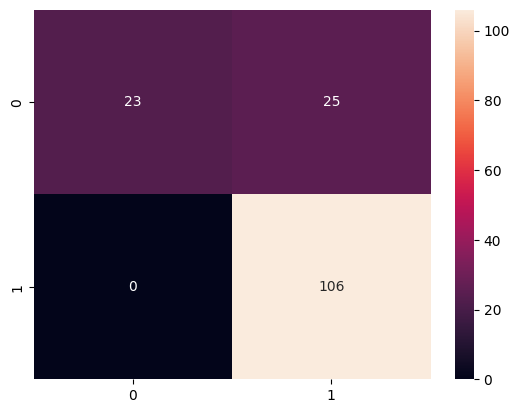

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cbar=True, fmt='g')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       1.00      0.48      0.65        48
           Y       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.77       154
weighted avg       0.87      0.84      0.82       154



In [ ]:
# searilazation
import joblib
joblib.dump(model3,'Loan_pred')

['Loan_pred']

In [ ]:
# desarilazation
import joblib
text_model=joblib.load('Loan_pred')

In [ ]:
import pickle
file="loan_est.pkl"
with open(file,'wb') as f:
  pickle.dump(model,f)

In [ ]:
with open(file,'rb') as f:
  k=pickle.load(f)

In [ ]:
k=text_model.predict([[1,	1	,0	,1	,1	,246000,	0.0	,5412	,360.0,	1.0	,0	]])

print(k)

['N']


In [ ]:
k=text_model.predict([[0,	0	,0,	1	,0,	36000,	198006.0	,104960	,360.0	,1.0	,1		]])

print(k)

['N']


In [ ]:
k=text_model.predict([[0,	0,	0	,1	,1	,232323,	10000,	133.000000,	360.0,	0.0	,2		]])

print(k)

['N']


In [ ]:
import joblib
